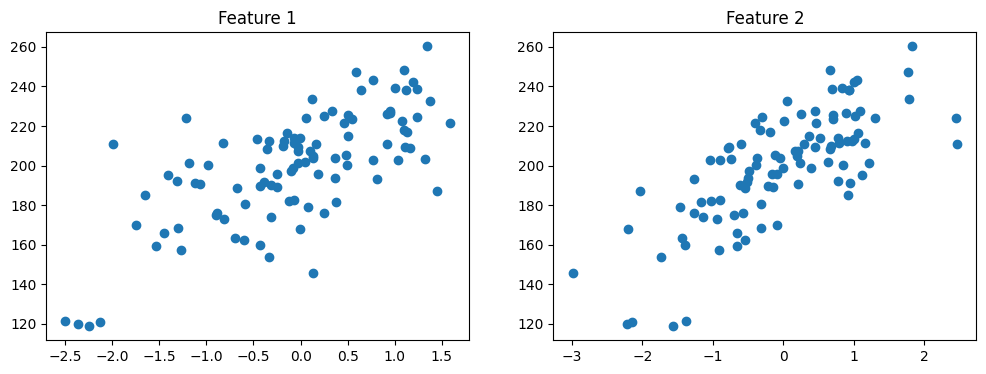

In [1]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

x,y  = datasets.make_regression(n_samples=100, n_features=2, bias=200, noise=5)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(x[:,0],y)
plt.title("Feature 1")

plt.subplot(1,2,2)
plt.scatter(x[:,1],y)
plt.title("Feature 2")
plt.show()

In [8]:
print(x.shape[1])

2


In [2]:
import numpy as np

class LinearRegression:
    def __init__(self,learning_rate = 0.001, n_iterations = 10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = None
    
    def model(self,x):
        y_pred = x.dot(self.weights)+self.bias
        return y_pred
    
    # Mean Squared Error(MSE)    
    def loss(self,x,y):
        loss  = ((self.model(x)-y)**2).sum() / (2*len(x))
        return loss
    
    def fit(self,x,y):
        self.weights = np.ones(x.shape[1]) #number of weights = number of features
        self.bias = 0
        self.cost_history = []
        
        for _ in range(self.n_iterations):
             y_pred = self.model(x)
             self.weights-=self.learning_rate*(y_pred-y).dot(x)/x.shape[0] # gradient descent for the MSE loss function
             self.bias -= (y_pred-y).sum()/x.shape[0]
             self.cost_history.append(self.loss(x,y))
    
    def predict(self,x):
        return self.model(x)

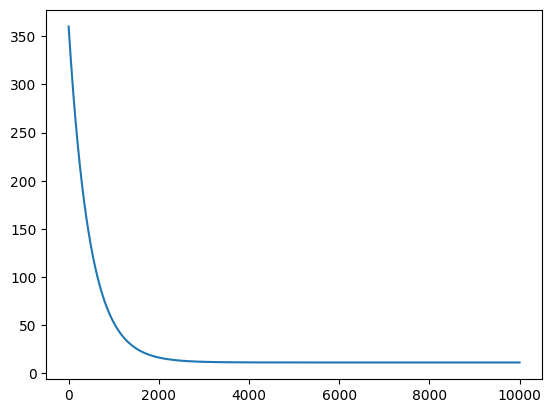

In [3]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)
plt.plot(lin_reg.cost_history)
plt.show()